<h1>Proyecto 2 – Predecir la calidad del Vino</h1>
Presentado por:<br>
<lu>
  <li>HENRY RAGUA FORERO</li>
  <li>GILBERTO BOTIA BLANDON</li>
</lu>
<p>
El objetivo de este ejercicio es el de predecir la calidad del vino. A lo largo del ejercicio se explorará la data proveniente de <a href="https://archive.ics.uci.edu/dataset/186/wine+quality">https://archive.ics.uci.edu/dataset/186/wine+quality</a> de donde se tomará el dataset de los vino tintos.
</p>
<p>
Para evitar conflictos de interés, se evita poner marcas, precios, tipos de uvas y origen, solamente se tendrá en cuenta mediciones tomadas por expertos y con instrumentos en igualdad de condiciones.
</p>





In [71]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [72]:
# Se carga el dataset a partir de un archivo csv que deberá estar en el mismo
# directorio donde se encuentra el presente archivo de análisis de
# formato Jupyter.
df = pd.read_csv('winequality-red.csv', sep=';')

In [73]:
# se obtiene la información general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [74]:
# si existen duplicados se eliminan
print("registros duplicados: ", df.duplicated().sum())
if df.duplicated().any():
  df = df.drop_duplicates()
df.shape

registros duplicados:  240


(1359, 12)

Se eliminaron 240 registros duplicados

<p>
Podemos ver que se cuenta con 1359 registros y que todos tienen valores en todas sus filas, no hay valores nulos.
</p>
<p>
A partir de la documentación del dataset e investigación del contexto, se puede describir las columnas así:
</p>
<table>
  <thead>
    <tr>
      <th width="120px">Variable</th>
      <th>Descripción</th>
      <th width="100px">Tipo de Variable</th>
    </tr>
  </thead>
  <tbody>
  <tr>
    <td>fixed acidity</td>
    <td>La acidez fija es el conjunto de ácidos naturales del vino, ayudan a preservar las cualidades naturales del vino, así como su color.</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>volatile acidity</td>
    <td>La volatilidad de los ácidos de los vinos debe ser baja para su buena calidad y su comercialización.</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>citric acid</td>
    <td>El ácido cítrico aporta sabores frescos y aromáticos.</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>residual sugar</td>
    <td>El azúcar residual proviene de los azúcares naturales de la uva que quedan después de finalizada la fermentación alcohólica. Entre menos azúcar, más seco el vino.</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>chlorides</td>
    <td>la concentración de iones de cloruro indica la presencia de cloruro de sodio, El cual aumenta el sabor salado del vino, lo que puede contribuir o restar valor al sabor y la calidad del vino.</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>free sulfur dioxide</td>
    <td>Son iones de dióxido de azufre que no están unidos químicamente. Esta medición es importante para evitar causar peligro a la salud si se bebe en exceso.</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>total sulfur dioxide</td>
    <td>El dióxido de azufre total es la suma del dióxido de azufre libre y el dióxido de azufre combinado.</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>density</td>
    <td>La densidad del vino es importante para determinar el extracto. El vino es una mezcla que contiene principalmente sólidos disueltos, que aumentan su densidad.</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>pH</td>
    <td>el pH en el vino debería ester entre 3.4 y 3.6, si es mayor, indica que el vino es inestable y si es menor, indica que es demasiado ácido.</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>sulphates</td>
    <td>Cantidad de sulfatos en el vino, normalmente afectan la respiración, pero algunas personas tienen reacciones cutáneas, como urticaria, o problemas digestivos.</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>alcohol</td>
    <td>Es la cantidad de alcohol presente en el vino</td>
    <td>Decimal</td>
  </tr>
  <tr>
    <td>quality</td>
    <td>Es la calificación de la calidad del vino, si tiene una calificación de 6 o más, se dice que el vino es de buena calidad</td>
    <td>Entero</td>
  </tr>
  </tbody>
</table>

In [92]:
# se visualizan los primeros registros del DataFrame
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,102.0,0.9978,3.35,0.80,10.5,5
10,6.7,0.58,0.08,1.8,0.097,65.0,0.9959,3.28,0.54,9.2,5


Efectivamente los valores de medición todos son decimales valores de

In [76]:
# se verificarán si hay valores de "total sulfur dioxide" menores que
# los de "free sulfur dioxide"
df_totales_menores_que_free = df[df['total sulfur dioxide'] < df['free sulfur dioxide']]
df_totales_menores_que_free.shape


(0, 12)

Efectivamente la Data está bien en este sentido, por tanto, se puede prescindir de la columna "free sulfur dioxide" como caraxcterística para la regresión.

In [77]:
# se elimina la columna "free sulfur dioxide"
df = df.drop(['free sulfur dioxide'], axis=1)

In [78]:
# se obtiene la información general de cada columna
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


encontramos que muy probablemente hay valores anómalos para "total sulfor dioxide", vamos a revisar que valores podemos sacar:

In [79]:
df.sort_values(by=['total sulfur dioxide'], ascending=False).head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1081,7.9,0.300,0.68,8.3,0.050,289.0,0.99316,3.01,0.51,12.3,7
1079,7.9,0.300,0.68,8.3,0.050,278.0,0.99316,3.01,0.51,12.3,7
354,6.1,0.210,0.40,1.4,0.066,165.0,0.99120,3.25,0.59,11.9,6
1244,5.9,0.290,0.25,13.4,0.067,160.0,0.99721,3.33,0.54,10.3,6
651,9.8,0.880,0.25,2.5,0.104,155.0,1.00100,3.41,0.67,11.2,5
109,8.1,0.785,0.52,2.0,0.122,153.0,0.99690,3.21,0.69,9.3,5
684,9.8,0.980,0.32,2.3,0.078,152.0,0.99800,3.25,0.48,9.4,5
672,9.8,1.240,0.34,2.0,0.079,151.0,0.99800,3.15,0.53,9.5,5
515,8.5,0.655,0.49,6.1,0.122,151.0,1.00100,3.31,1.14,9.3,5
591,6.6,0.390,0.49,1.7,0.070,149.0,0.99220,3.12,0.50,11.5,6


No es lógico que para valores tan altos, de 160 hacia arriba, tengan una calificación de buen vino, a sabiendas que altos valores para este campo puede ser perjudicial para la salud, por tanto se procede a eliminar estos valores no congruentes.

In [80]:
df = df[df['total sulfur dioxide'] < 160]

In [93]:
# se imprime nuevamente la descripción de los datos
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000,1355.000000
mean,8.314613,0.530229,0.271653,2.507675,0.088212,46.305904,0.996718,3.310258,0.659063,10.428573,5.620664
std,1.737205,0.182766,0.195164,1.302426,0.049421,31.884583,0.001861,0.154827,0.170782,1.080534,0.822963
min,4.600000,0.120000,0.000000,0.900000,0.012000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,63.000000,0.997825,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,155.000000,1.003690,4.010000,2.000000,14.900000,8.000000


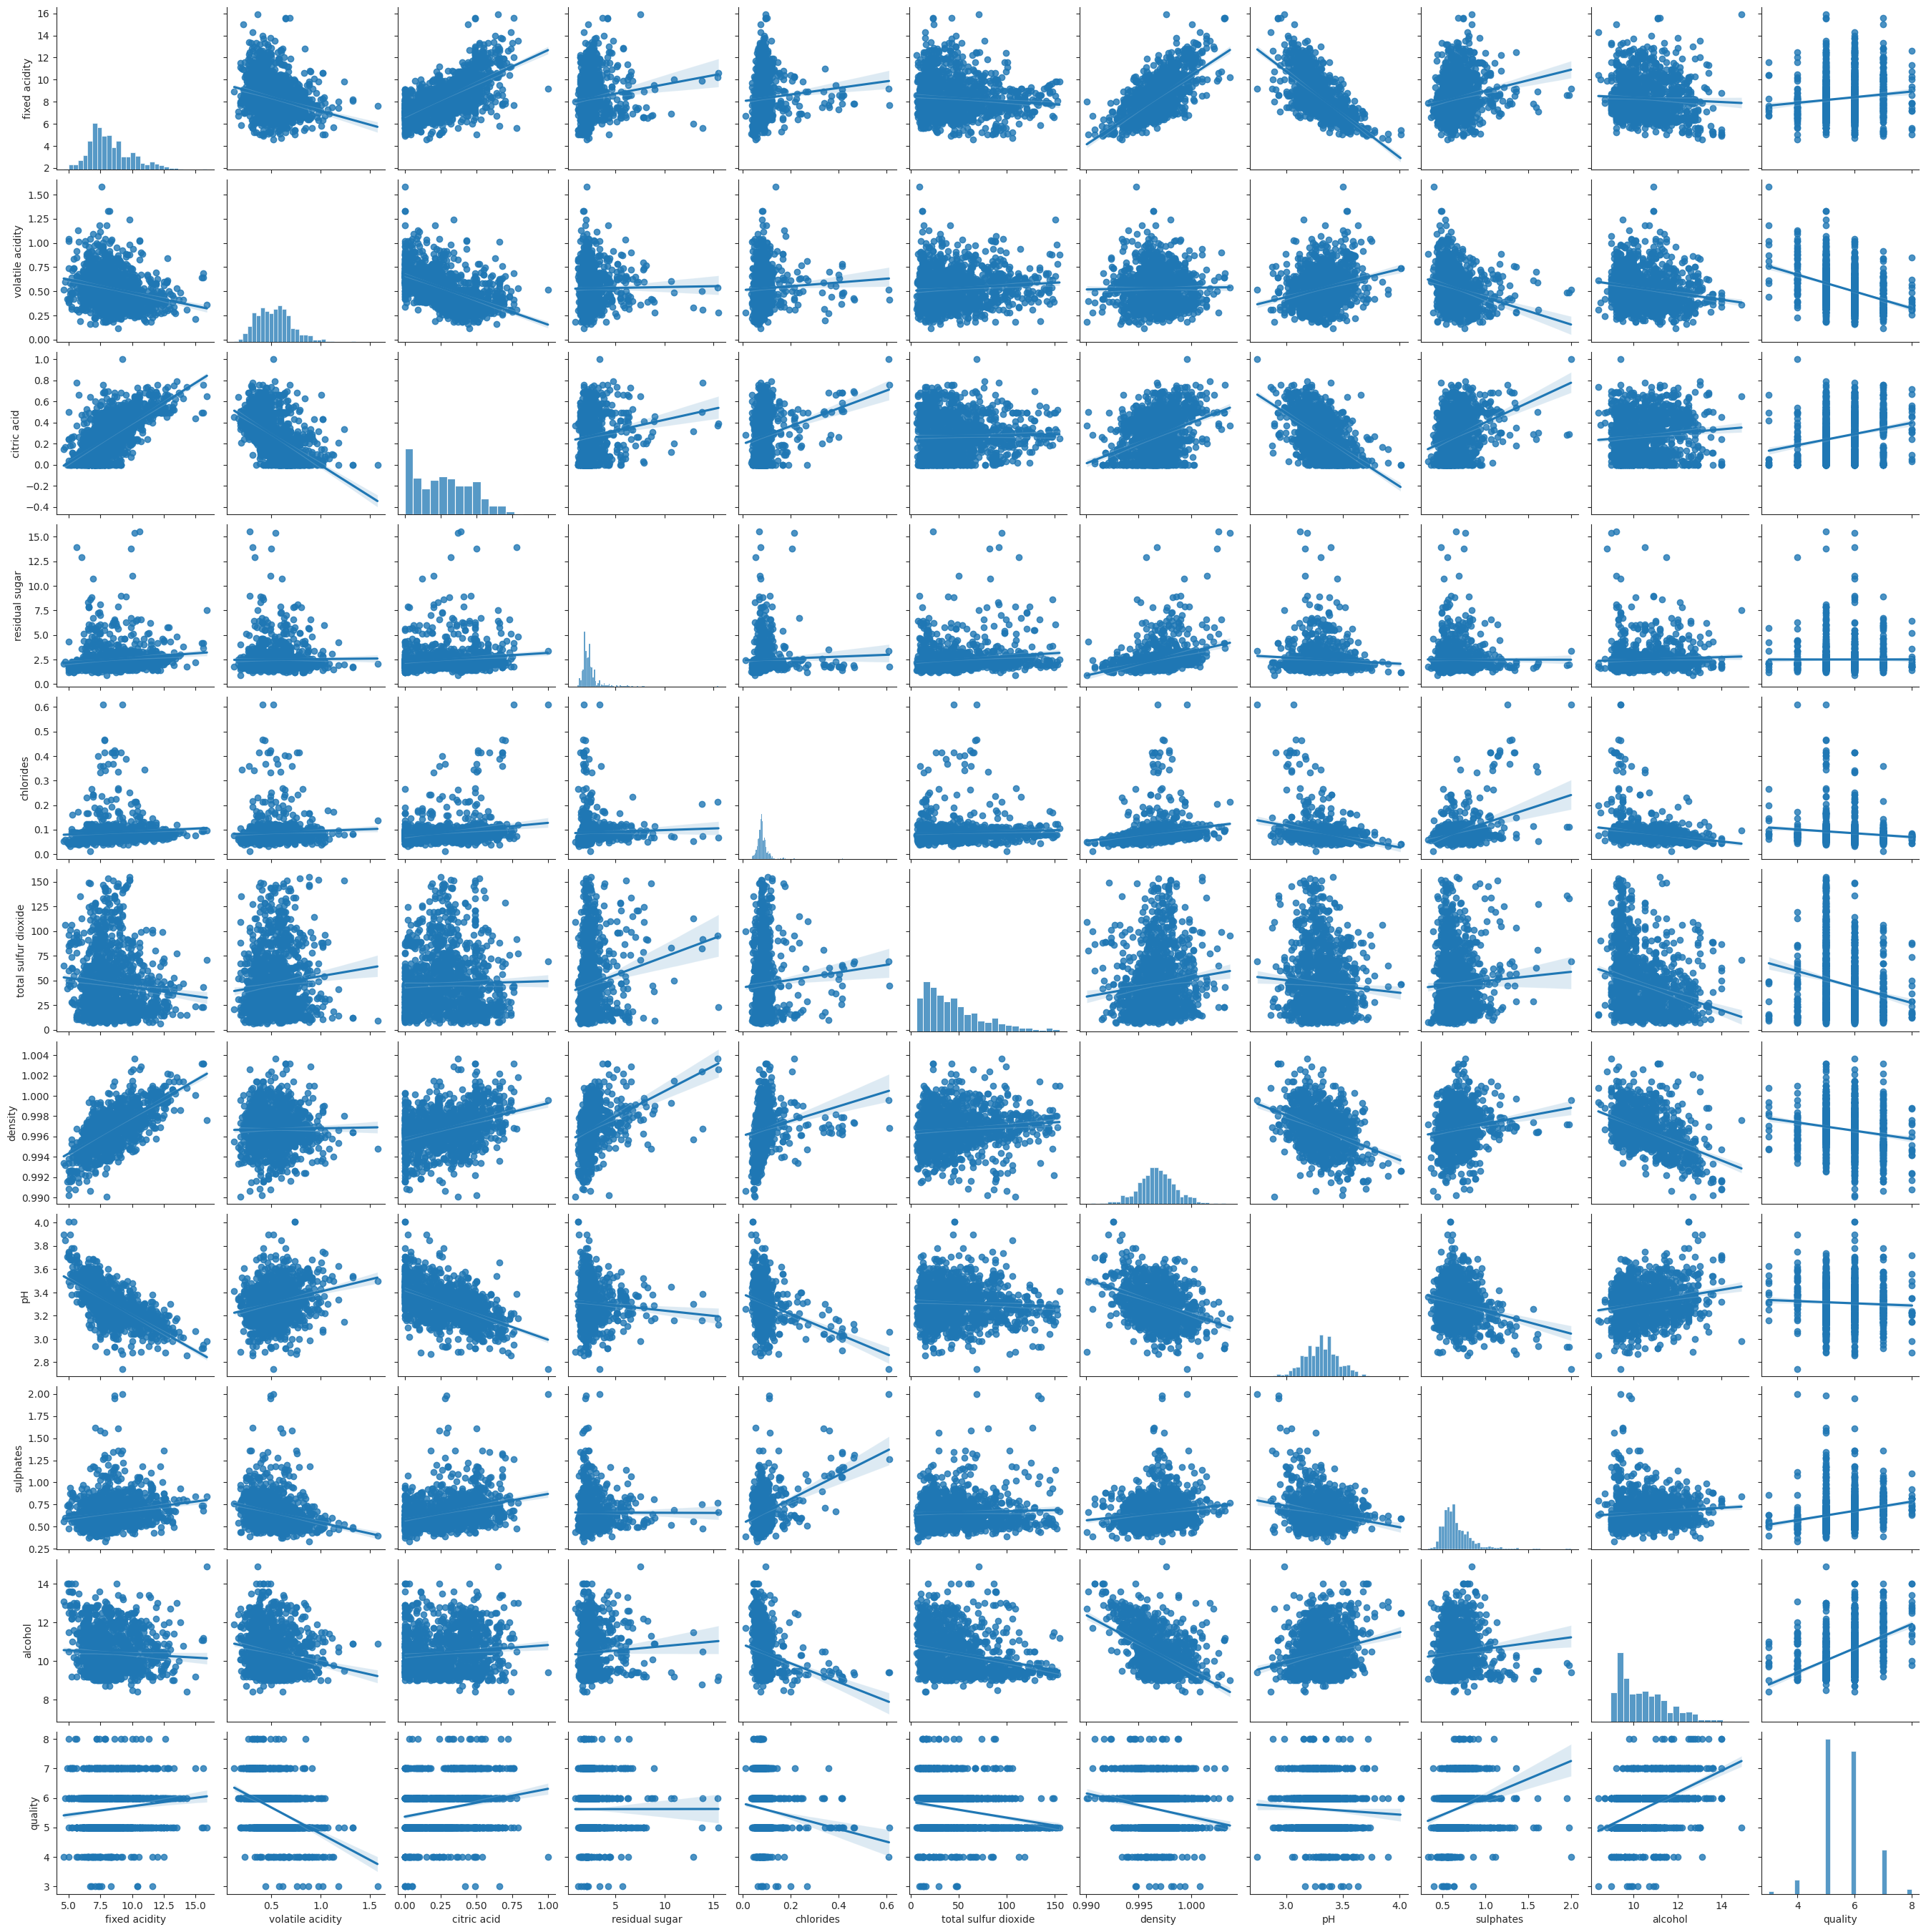

In [95]:
# se crean los diagramas de dispersión entre variables
sns.pairplot(df, kind="reg", diag_kind="kde")

Nos podemos dar cuenta que la calificación es una variable discreta, lo cual representará un reto para el análisis de la regresión lineal puesto que no hay una distribución lineal con algún otro valor, el margen de error absoluto puede ser muy grande

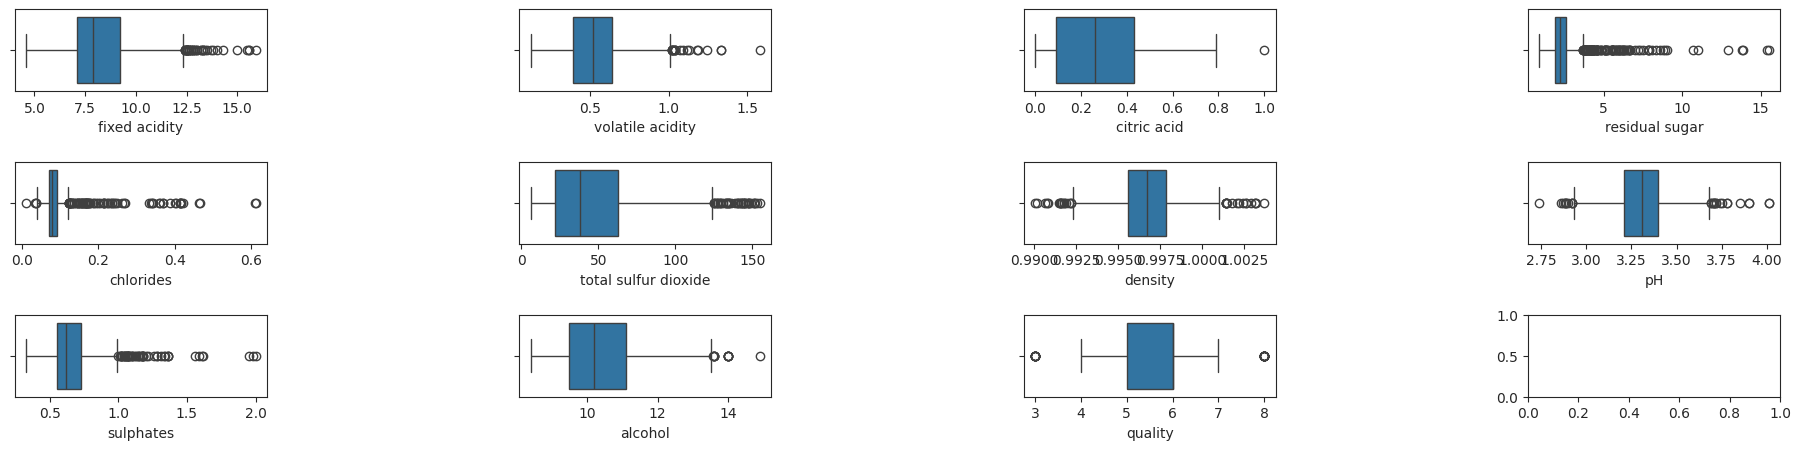

In [82]:
# se grafican los boxplot de los datos
fig, ax = plt.subplots(ncols = 4, nrows=3, figsize=(19,5))
fig.tight_layout(pad=3)
plt.subplots_adjust(wspace = 1)
sns.set_style('ticks')
i = 0
for row in ax:
  for col in row:
    if i < df.columns.size:
      sns.boxplot(data=df, x=df.columns[i], ax=col)
    i += 1
plt.show()

Tendremos en cuenta este gráfico para compararlo con los siguientes, para poder ver cuáles variables son las más convenientes para predecir la calidad del vino. Tendremos en cuenta las variables que tienen valores más atípicos que otras, tales como "residual sugar" y "chlorides" como candidatas si estas no están fuertemente relacionadas con "quality".<br>
A continuación se generará la matriz de correlaciones.

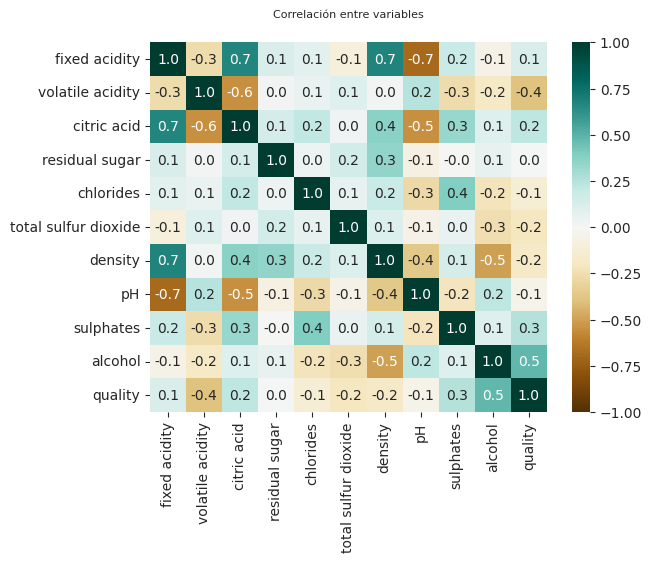

In [83]:
# se obtiene la correlación entre las columnas
corr = df.corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt=".1f")
heatmap.set_title('Correlación entre variables', fontdict={'fontsize':8}, pad=18)
plt.show()

Ya podemos ver que la calidad está correlacionada en mejor medida con "alcohol", "volatile acidity", "sulphates" y se tendrá en cuenta para hacer las depuraciones de los ejercicios de regresión en ese orden (correlación media entre 0.3 y 0.5 positiva o negativa)

<h1>Regresión Lineal<h1>
<p>A continuación se inica el proceso para entrenar el modelo y encontrar el mejor que se ajuste a la regresión lineal</p>

In [99]:
# para facilidad de las posibles pruebas que se vayan a hacer para encontrar
# el mejor modelo de la regresión lineal, se crea una función en la que se
# ejecutarán todas las acciones para este tipo de regresión
def regresion_lineal(X, y):
  '''Retorna los valores absolutos de error: '''
  # se obtiene los datos de entrenamiento
  train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
  # se crea el modelo de regresión en el pipeline
  regression = LinearRegression()
  # se entrena el modelo
  regression.fit(train_X, train_y)
  # se realiza la predicción del modelo
  y_pred = regression.predict(val_X)
  # obtiene las mediciones de los errores
  mae = mean_absolute_error(val_y, y_pred)
  mse = mean_squared_error(val_y, y_pred)
  rmse = np.sqrt(mse)
  score_regression = regression.score(val_X, val_y)

  # se obtienen los score a partir de los algoritmos de regularización
  # Ridge
  ridge = Ridge(alpha=10.0)
  ridge.fit(train_X, train_y)
  score_ridge = ridge.score(val_X, val_y)
  # Lasso
  lasso = Lasso(alpha=10.0)
  lasso.fit(train_X, train_y)
  score_lasso = lasso.score(val_X, val_y)
  # SGD
  sgd = SGDRegressor(max_iter=1000, tol=1e-3)
  sgd.fit(train_X, train_y)
  score_sgd = sgd.score(val_X, val_y)
  return score_regression, score_ridge, score_lasso, score_sgd, mae, mse, rmse

Podremos invocar esta función las veces que sea necesario, cambiando el parámetro "y"

In [100]:
y = df['quality']
opciones = [
    df.drop(['quality'], axis=1), # con todas las columnas
    df[["alcohol", "volatile acidity", "sulphates"]], # con las tres propiedades de mayor correlación
    df[["alcohol", "volatile acidity"]], # las dos con mayor correlación
    df[["alcohol"]], # la columna con mayor correlación
    df[["residual sugar", "fixed acidity"]] # columnas con menor correlación
]
for opcion in opciones:
  score_regression, score_ridge, score_lasso, score_sgd, mae, mse, rmse = regresion_lineal(X=opcion, y=y)
  print('Medición de error para las predicciones con las características:')
  print(opcion.columns)
  print('MAE:\t', mae)
  print('MSE:\t', mse)
  print('RMSE:\t', rmse)
  print('Scores:')
  print('\tModelo Regresión:\t', score_regression)
  print('\tModelo Ridge:\t\t', score_ridge)
  print('\tModelo Lasso:\t\t', score_lasso)
  print('\tModelo SGD:\t\t', score_sgd)
  print('*********************************************************************')

Medición de error para las predicciones con las características:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')
MAE:	 0.5209833316918102
MSE:	 0.4652893374315824
RMSE:	 0.6821212043556353
Scores:
	Modelo Regresión:	 0.25256477569227154
	Modelo Ridge:		 0.2452327909743207
	Modelo Lasso:		 -0.0007263740484988457
	Modelo SGD:		 -1.3558198232266616e+25
*********************************************************************
Medición de error para las predicciones con las características:
Index(['alcohol', 'volatile acidity', 'sulphates'], dtype='object')
MAE:	 0.5290947171003935
MSE:	 0.46166430503684525
RMSE:	 0.6794588324812956
Scores:
	Modelo Regresión:	 0.2583879843564537
	Modelo Ridge:		 0.25357333663942294
	Modelo Lasso:		 -0.0007263740484988457
	Modelo SGD:		 0.13040010626681142
*****************************************************************

<h2>Conclusión de Regresión Lineal</h2>
<p>
El mejor score encontrado es de <b>0.258</b>, obtenido a partir de la predicción teniendo en cuenta todas las características del modelo con la calidad del vino, pero realmente es muy bajo con respecto a lo esperado.<br>
El menor error absoluto encontrado es de <b>0.521</b>, hallado a partir de tener encuenta todas las características del vino.<br>
Al explorar la regularización del algoritmo, vemos una leve mejoría implementado la Regresión Rígida, a continuación se hallará el error absoluto para este tipo de regresión.<br>
También nos damos cuenta que entre menos columnas a evaluar, era más alto el error.<br>
Adicionalmente se prueba que si se toman variables con correlación muy baja, los errores son más distantes a los esperado.
</p>

In [86]:
# modelo de regresión RIDGE, tomando la mejor combinación de variables
train_X, val_X, train_y, val_y = train_test_split(opciones[0], y, random_state = 0)
ridge = Ridge(alpha=10.0)
ridge.fit(train_X, train_y)
y_pred = ridge.predict(val_X)
mean_ridge = mean_absolute_error(val_y, y_pred)
print('El error absolute con la regresión RIDGE es: ', mean_ridge)

El error absolute con la regresión RIDGE es:  0.52609774152206


Podemos ver que el error absoluto baja un poco

<h1>Regresión Logística</h1>
<p>
Ahora haremos la regresión logística, para lo cual definiremos la variable objetivo como categórica a partir de la afirmación de que los buenos vinos son aquellos cuya calificación es de 6 o más, y los demás serán vinos regulares
</p>

In [87]:
# se agrega una copia al dataframe y se crea la columna categórica a predecir
BUENO = 1
REGULAR = 0
df_logistica = df.copy()
df_logistica['categorical_quality'] = np.where(df_logistica['quality'] >= 6, BUENO, REGULAR)
df_logistica = df_logistica.drop(['quality'], axis=1)

Se agrega la nueva columna y se elimina la de la calidad numérica

In [88]:
# se imprimen los primeros registros del nuevo data frame
df_logistica.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,categorical_quality
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,40.0,0.9978,3.51,0.56,9.4,0


Ya podemos ver la nueva columna sobre la cuál se intentará hacer la clasificación

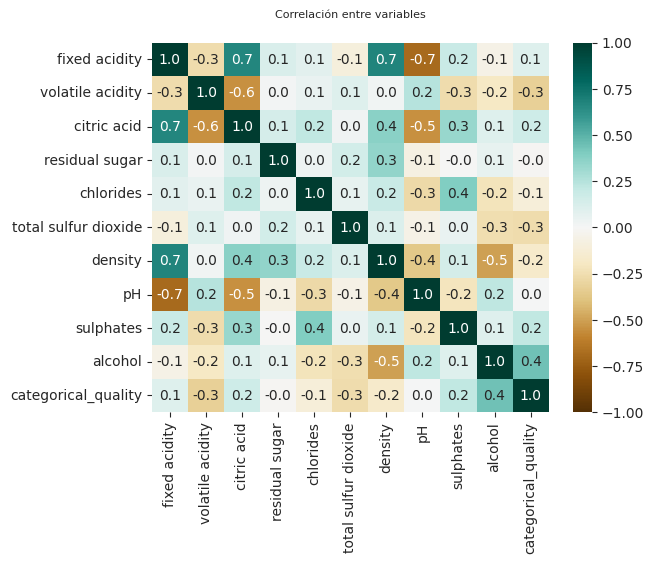

In [89]:
# se imprime la nueva tabla de correlación
corr = df_logistica.corr()
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG', fmt=".1f")
heatmap.set_title('Correlación entre variables', fontdict={'fontsize':8}, pad=18)
plt.show()

In [90]:
# se crea la función que permite ejecutar la regresión logística
def regresion_logistica(X, y):
  '''Retorna el score y el error absoluto de la regresión logística'''
  # se obtienen los elementos para el entrenamiento y las pruebas
  train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, train_size=0.8, test_size=0.2)
  # se crea el pipeline con los pasos de la estandarización de los datos y la regresión logística
  pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # se entrena el modelo
  pipe.fit(train_X, train_y)
  # se ejecuta la predicción
  y_pred = pipe.predict(val_X)
  # se obtienen los scores y el error absoluto
  mean_logreg = mean_absolute_error(val_y, y_pred)
  score_logreg = pipe.score(val_X, val_y)
  return score_logreg, mean_logreg

Podemos invocar esta función las veces que sea necesario cambiando el parámetro "y"

In [105]:
# se reutilizan las opciones utilizadas en las regresiones lineales
opciones = [
    df_logistica.drop(['categorical_quality'], axis=1), # con todas las columnas
    df_logistica[["alcohol", "volatile acidity", "sulphates"]], # con las tres propiedades de mayor correlación
    df_logistica[["alcohol", "volatile acidity"]], # las dos con mayor correlación
    df_logistica[["alcohol"]], # la columna con mayor correlación
    df_logistica[["residual sugar", "fixed acidity"]] # columnas con menor correlación
]
y = df_logistica['categorical_quality']
for opcion in opciones:
  score, mean = regresion_logistica(X=opcion, y=y)
  print('Medición de error para las predicciones con las características:')
  print(opcion.columns)
  print('MEAN:\t', mean)
  print('Score:\t', score)
  print('*********************************************************************')

Medición de error para las predicciones con las características:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')
MEAN:	 0.2915129151291513
Score:	 0.7084870848708487
*********************************************************************
Medición de error para las predicciones con las características:
Index(['alcohol', 'volatile acidity', 'sulphates'], dtype='object')
MEAN:	 0.2988929889298893
Score:	 0.7011070110701108
*********************************************************************
Medición de error para las predicciones con las características:
Index(['alcohol', 'volatile acidity'], dtype='object')
MEAN:	 0.2952029520295203
Score:	 0.7047970479704797
*********************************************************************
Medición de error para las predicciones con las características:
Index(['alcohol'], dtype='object')
MEAN:	 0.335793357933

<h2>Conclusiones de la regresión logística</h2>
<p>La predicción con menor error absoluto fue la que se generó con las características con mayor correlación</p>
<p>Hay que resaltar que los resultados son mejores que los de la regresión lineal, puesto que efectivamente como estaban planteados los datos, apuntaban a que fuera una regresión de clasificación y no, una de distribución lineal</p>

<h1>Conclusiones Generales del Ejercicio</h1>

<p>A partir de lo explorado en este ejercicio de regresiones, se puede llegar a la conclusión de que para este ejercicio es más efectiva una regresión de clasificación, puesto que si analizamos los resultados de la calificación obscilan entre 3 y 4, en valores enteros, es decir que se asemeja más a una medición discreta que a una lineal, lo cuál se corroboró con las gráficas de dispersión, ya que no es posible crear una distribución lineal con ninguna otra variable</p>
<p>Al implementar el modelo clasificación de la regresión logística, se logra con el objetivo de predecir si un vino es bueno o es regular, con una mayor exactitud de la que podría lograr con modelo de regresión lineal</p>
